In [17]:
#importer les fichiers que nous avons besoins 
import requests 
import pandas 
from datetime import date
from datetime import timedelta
#format pour les nombres 
pandas.options.display.float_format = '{:.2f}'.format
#créer la valeur "Hier" pour avoir automatiquement la dernière colonne du tableau soit la dernière journée. 
#car la mise à jour se fait souvent le soir. Donc il est possible que le fichier ne contiennent pas les données "d'aujourd'hui"
today = date.today()
hier = today - timedelta (days = 1)
hier = hier.strftime("%#m/%#d/%y")

# Dans le fichier le nombre afficher à chque jour est le nouveau nombre de cas (ou de décès) par région 
# À partir du 22 janvier 2020 

#Lien pour les CAS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

#Lien pour les DÉCÈS https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

#Lien pour les rétablisssements https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

In [18]:
#Faire un tableau du nb de cas au canada par (région/province) Province/State

fichier_cas = pandas.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", sep = "," )

cas_can = fichier_cas[fichier_cas["Country/Region"] == "Canada"]
#Retirer les bâteaux de croisières
cas_can = cas_can.drop([231,238,37])
cas_can = cas_can.sort_values(by=[hier],ascending=False)

cas_can.melt(cas_can,
 id_vars=["Province/State"],
 value_vars=["1/22/20", "1/23/20"],
 value_name="Data")
cas_can


TypeError: melt() got multiple values for argument 'id_vars'

In [ ]:
#Graphique Provinces du Canada. nb de cas par jour depuis le début 
#Faire le graphique 
import seaborn 



#CAN_CAS = cas_can.pivot(index= None, columns='Province/State',values= ['1/22/20']) 
#CAN_CAS

#seaborn.lineplot(data=cas_can)



Text(0.5, 0, 'Province')

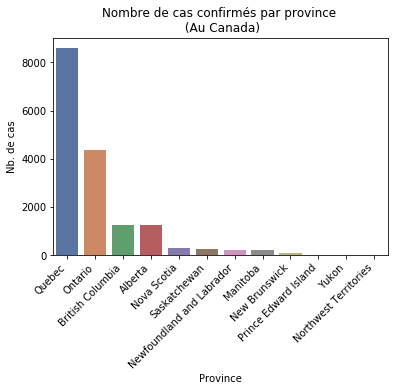

In [19]:
#Graphique nb de cas par Province 
import seaborn
import matplotlib.pyplot 
graph = seaborn.barplot(x="Province/State", y=hier, palette="deep", data=cas_can)

graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')
matplotlib.pyplot.title("Nombre de cas confirmés par province \n (au Canada)")
matplotlib.pyplot.ylabel("Nb. de cas")
matplotlib.pyplot.xlabel("Province")
